The Consumer Price Index is a measure of the average monthly change in the price of goods and services paid by urban consumers between any two time periods.

The Unemployment rate represents the number of unemployed as a percentage of the labor force.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
raw_cpi_data = pd.read_csv('CPIAUCSL.csv')
unemploy_data = pd.read_csv('UNRATE.csv')

In [18]:
raw_cpi_data['DATE'] = pd.to_datetime(raw_cpi_data['DATE'])
unemploy_data['DATE'] = pd.to_datetime(unemploy_data['DATE'])

In [19]:
raw_cpi_data.set_index('DATE', inplace=True)
unemploy_data.set_index('DATE', inplace=True)

In [20]:
cpi = raw_cpi_data.loc['1960-01-01':'2017-09-30']

In [21]:
unemploy = unemploy_data.loc['1960-01-01':'2017-09-30']

In [22]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 693 entries, 1960-01-01 to 2017-09-01
Data columns (total 1 columns):
CPIAUCSL    693 non-null float64
dtypes: float64(1)
memory usage: 10.8 KB


In [23]:
unemploy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 693 entries, 1960-01-01 to 2017-09-01
Data columns (total 1 columns):
UNRATE    693 non-null float64
dtypes: float64(1)
memory usage: 10.8 KB


In [24]:
df = pd.concat([cpi, unemploy], axis=1)

In [28]:
df2 = df.iloc[::3, :]

In [30]:
df2.head()

,CPIAUCSL,UNRATE
DATE,,
1960-01-01,29.37,5.2
1960-04-01,29.54,5.2
1960-07-01,29.55,5.5
1960-10-01,29.75,6.1
1961-01-01,29.84,6.6


In [33]:
df2['CPIAUCSL'].diff()

DATE
1960-01-01      NaN
1960-04-01    0.170
1960-07-01    0.010
1960-10-01    0.200
1961-01-01    0.090
1961-04-01   -0.030
1961-07-01    0.110
1961-10-01    0.060
1962-01-01    0.060
1962-04-01    0.170
1962-07-01    0.010
1962-10-01    0.160
1963-01-01    0.060
1963-04-01    0.040
1963-07-01    0.210
1963-10-01    0.060
1964-01-01    0.190
1964-04-01    0.010
1964-07-01    0.070
1964-10-01    0.100
1965-01-01    0.160
1965-04-01    0.100
1965-07-01    0.200
1965-10-01    0.070
1966-01-01    0.230
1966-04-01    0.400
1966-07-01    0.170
1966-10-01    0.400
1967-01-01    0.050
1967-04-01    0.200
              ...  
2010-04-01   -0.085
2010-07-01    0.202
2010-10-01    1.430
2011-01-01    2.152
2011-04-01    2.906
2011-07-01    1.302
2011-10-01    1.355
2012-01-01    1.092
2012-04-01    1.345
2012-07-01   -0.597
2012-10-01    3.048
2013-01-01   -0.026
2013-04-01    0.183
2013-07-01    1.094
2013-10-01    0.829
2014-01-01    1.667
2014-04-01    1.086
2014-07-01    0.953
2014-10-01    0

In [16]:
df['cpi_pct_change'].describe()

count    452.000000
mean       0.002552
std        0.002936
min       -0.017705
25%        0.001246
50%        0.002325
75%        0.003729
max        0.013924
Name: cpi_pct_change, dtype: float64

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lm = LinearRegression()

In [88]:
X = pd.DataFrame(df.CPIAUCSL)

In [89]:
y = list(df.UNRATE)

In [90]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
print('coefficients: ' + str(lm.coef_))
print('intercept: ' + str(lm.intercept_))
print('score: ' + str(lm.score(X,y)))

coefficients: [-0.006883]
intercept: 7.48642553855
score: 0.0415976397095


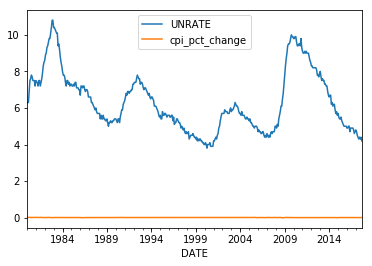

In [15]:
df[['UNRATE', 'cpi_pct_change']].plot()